# AI Comparisons

This notebook is for comparing the different AI's by letting them compete against each other. 

In [1]:
%run Core.ipynb

The function *empty_caches()* empties all existing caches from the Core notebook.

In [2]:
def empty_caches():
    global Cache
    Cache = {}
    global gCache
    gCache = {}
    global Cache_test
    Cache_test = {}
    global Cache_eval
    Cache_eval = {}

### Function: compare_AIs
The function *compare_AIs* takes two AI's as arguments. Then 50 games are played where each player is beginning 25 times. For each game the seeds are changed to generate different games. At the end the result is printed out that shows how many times each AI has won. 

In [3]:
def compare_AIs(AI_1, AI_2, seed=0):
    empty_caches()
    
    rn.seed(seed)

    ai1 = 0
    ai2 = 0

    for _ in range(25):
        rn.seed(seed)
        game1 = Kalah_Game([AI_1, AI_2],0)
        game1.start()
        won1 = utility(game1.state, 0)
        
        if won1 == 1:
            ai1 += 1
        elif won1 == -1:
            ai2 += 1
        else:
            pass
            
        ############################
        
        game2 = Kalah_Game([AI_2, AI_1],0)
        game2.start()
        won2 = utility(game2.state, 0)

        if won2 == 1:
            ai2 += 1
        elif won2 == -1:
            ai1 += 1
        else:
            pass

    print(str(AI_1.name) + f" won {ai1} times, " + str(AI_2) + f" won {ai2} times and {50-ai1-ai2} games ended as draws.")

## Tests Minimax 

In this section we are executing the following tests:

- Random AI plays against Minimax AI
- Two Minimax AI's play against each other with same and different limits

#### Test: Random_AI vs. Minimax

In this test the Random AI and the Minimax AI are playing against each other.

In [4]:
compare_AIs(Random_AI("Rando_first", 1), Minimax("Minimax_2_second", 2))

Rando_first won 0 times, Minimax_2_second won 50 times and 0 games ended as draws.


As expected the Minimax AI wins every time. 

#### Test: Minimax vs. Minimax 

In this test two Minimax AI's play against each other with the same limit of 3.

In [5]:
compare_AIs(Minimax("Mima_3_first", 3), Minimax("Mima_3_second", 3))

Mima_3_first won 25 times, Mima_3_second won 25 times and 0 games ended as draws.


In [6]:
for i in range(15):
    print("For 50 games with the seed " + str(i) + " the result is:")
    compare_AIs(Minimax("Mima_4_first", 4), Minimax("Mima_3_second", 3), i)


For 50 games with the seed 0 the result is:
Mima_4_first won 25 times, Mima_3_second won 25 times and 0 games ended as draws.
For 50 games with the seed 1 the result is:


KeyboardInterrupt: 

As expected each player wins 25 times. When two AI's with the same limit play against each other the player who is beginning wins. 

In the following two tests two Minimax AI's with different limits are competing.

In [ ]:
compare_AIs(Minimax("Mima_4_first", 4), Minimax("Mima_3_second", 3), 0)

Mima_4_first won 25 times, Mima_3_second won 25 times and 0 games ended as draws.


In [ ]:
compare_AIs(Minimax("Mima_5_first", 5), Minimax("Mima_4_second", 4))

KeyboardInterrupt: 

In [ ]:
compare_AIs(Minimax("Mima_5_first", 5), Minimax("Mima_3_second", 3))

Mima_5_first won 50 times, Mima_3_second won 0 times and 0 games ended as draws.


In the first test the Minimax AI with the lower AI wins slightly more often which is an unexpected result. The other tests show the expected result which is that the AI with a higher limit wins more often. In the second test it is a limit difference of 1 like the first test. The third test works with a limit difference of 2. <br>
The difference of the win rate in the first two tests is unexpected. It could be reasoned with odd and even limits which will be discussed in the conclusion part. 

## Tests: Alpha-Beta

In this section we are executing the following tests:

- two AlphaBeta AI's play against each other with same and different limits
- Minimax AI plays against AlphaBeta AI with same and different limits 

#### Test AlphaBeta vs. AlphaBeta

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_3_first", 3), AlphaBeta("AlphaBeta_3_second", 3))

AlphaBeta_1 won 24 times, AlphaBeta_2 won 24 times and 2 games ended as draws.


As expected each player wins the same amount of times. Sometimes because of random choices when there are more best choices the resukt is a draw. 

In the following tests two AlphaBeta AI's with different limits are competing.

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_4_first", 4), AlphaBeta("AlphaBeta_3_second", 3))

AlphaBeta_1 won 24 times, AlphaBeta_2 won 24 times and 2 games ended as draws.


In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_5_first", 5), AlphaBeta("AlphaBeta_4_second", 4))

AlphaBeta_1 won 36 times, AlphaBeta_2 won 9 times and 5 games ended as draws.


In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_5_first", 5), AlphaBeta("AlphaBeta_3_second", 3))

AlphaBeta_1 won 39 times, AlphaBeta_2 won 9 times and 2 games ended as draws.


The results are similar are to the Minimax tests with the same limits. The difference is that in the first test the AI's have the same amount of wins. 

#### Test: Minimax vs. AlphaBeta

In this test the Minimax AI and the AlphaBeta AI are playing against each with the same limit of 3.

In [ ]:
compare_AIs(Minimax("Minimax_3_first", 3), AlphaBeta("AlphaBeta_3_second", 3))

Minimax won 25 times, AlphaBeta won 24 times and 1 games ended as draws.


With the same limit the beginning player mostly wins independently from the algorithm. Sometimes because of random choices when there are more best choices or because of a seed the result is not totally clear and the result is a draw.

The two AI's Minimax and AlphaBeta are competing against each other with different limits. In all tests each AI has a limit advantage of 1. In the first two tests the higher limit is an even number and in the last two tests the higher limit is an odd number.

In [ ]:
compare_AIs(Minimax("Minimax_4_first", 4), AlphaBeta("AlphaBeta_3_second", 3))

Minimax won 24 times, AlphaBeta won 22 times and 4 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax_3_first", 3), AlphaBeta("AlphaBeta_4_second", 4))

Minimax won 25 times, AlphaBeta won 24 times and 1 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax_4_first", 4), AlphaBeta("AlphaBeta_5_second", 5))

Minimax won 9 times, AlphaBeta won 36 times and 5 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax_5_first", 5), AlphaBeta("AlphaBeta_4_second", 4))

Minimax won 36 times, AlphaBeta won 9 times and 5 games ended as draws.


In the first two tests the result is very balanced. Slightly more games are won by the Minimax AI with a lower limit in the second test. In the last tests with an odd number as higher limit the AI with the higher limit wins more often. The observation from the previous tests with odd and even limits can bee seen again.

# Tests: Scout

In this section we are executing the following tests:

- Scout plays against Scout with same and different limits 
- Scout plays against Minimax with same and different limits 
- Scout plays against AlphaBeta with same and different limits 

#### Tests: Scout vs. Scout

In [ ]:
compare_AIs(Scout("Scout_3_first", 3), Scout("Scout_3_second", 3))

Scout_1 won 24 times, Scout_2 won 24 times and 2 games ended as draws.


With the same limit the beginning player mostly wins independently from the algorithm. Sometimes because of random choices when there are more best choices or because of a seed the result is not totally clear and the result is a draw.

In the following two tests two Scout AI's with different limits are competing.

In [ ]:
compare_AIs(Scout("Scout_4_first", 4), Scout("Scout_3_second", 3))

Scout_1 won 24 times, Scout_2 won 22 times and 4 games ended as draws.


In [ ]:
compare_AIs(Scout("Scout_5_first", 5), Scout("Scout_4_second", 4))

Scout_1 won 36 times, Scout_2 won 9 times and 5 games ended as draws.


The Scout AI with limit 4 won 2 games more than the Scout AI with limit 3. The second test uses a limit advantage by 1 too but in this test the higher limit is an odd number and the Scout AI with limit 5 wins noticeably more often. Again the observation from the previous tests with odd and even limits can bee seen.

#### Tests: Minimax and Scout

In this test the Minimax AI and the Scout AI are playing against each other with the same limit of 3.

In [ ]:
compare_AIs(Minimax("Minimax_3_first", 3), Scout("Scout_3_seconds", 3))

Minimax won 25 times, Scout won 24 times and 1 games ended as draws.


With the same limit the beginning player mostly wins independently from the algorithm. Sometimes because of random choices when there are more best choices or because of a seed the result is not totally clear and the result is a draw.

The two AI's Minimax and Scout are competing against each other with different limits. 

In [ ]:
compare_AIs(Minimax("Minimax_4_first", 4), Scout("Scout_3_second", 3))

Minimax won 24 times, Scout won 22 times and 4 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax_3_first", 3), Scout("Scout_4_second", 4))

Minimax won 25 times, Scout won 24 times and 1 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax_4_first", 4), Scout("Scout_5_second", 5))

Minimax won 9 times, Scout won 36 times and 5 games ended as draws.


In [ ]:
compare_AIs(Minimax("Minimax_5_first", 5), Scout("Scout_4_second", 4))

Minimax won 36 times, Scout won 9 times and 5 games ended as draws.


In the first two tests the result is very balanced. Slightly more games are won by the Minimax AI with a lower limit in the second test. In the last tests with an odd number as higher limit the AI with the higher limit wins more often. The observation from the previous tests with odd and even limits can bee seen again.

#### Tests: AlphaBeta and Scout

In this test the AlphaBeta AI and the Scout AI are playing against each with the same limit of 3.

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_3_first", 3), Scout("Scout_3_second", 3))

AlphaBeta won 24 times, Scout won 24 times and 2 games ended as draws.


With the same limit the beginning player mostly wins independently from the algorithm. Sometimes because of random choices when there are more best choices or because of a seed the result is not totally clear and the result is a draw.

The two AI's AlphaBeta and Scout are competing against each other with different limits. 

In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_4_first", 4), Scout("Scout_3_second", 3))

AlphaBeta won 24 times, Scout won 24 times and 2 games ended as draws.


In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_3_first", 3), Scout("Scout_4_second", 4))

AlphaBeta won 22 times, Scout won 24 times and 4 games ended as draws.


In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_5_first", 5), Scout("Scout_4_second", 4))

AlphaBeta won 36 times, Scout won 9 times and 5 games ended as draws.


In [ ]:
compare_AIs(AlphaBeta("AlphaBeta_4_first", 4), Scout("Scout_5_second", 5))

AlphaBeta won 9 times, Scout won 36 times and 5 games ended as draws.


In the first two tests the result is very balanced. Slightly more games are won by the Minimax AI with a lower limit in the second test. In the last tests with an odd number as higher limit the AI with the higher limit wins more often. The observation from the previous tests with odd and even limits can bee seen again.

# Same in Same out

In [20]:
%run Core.ipynb

In [ ]:
for i in range(1,5):
    assert Minimax("Mini",i).choose_house(gStartState) == AlphaBeta("Alpha", i, False).choose_house(gStartState) == Scout("Scout", i, False).choose_house(gStartState)

In [22]:
setSeedNumber(4)
i=4
print(Minimax("Mini",i, 0).choose_house(gStartState))
print(AlphaBeta("Alpha", i, 0).choose_house(gStartState))
print(Scout("Scout", i, 0).choose_house(gStartState))

5
5
5


In [23]:
setSeedNumber(4)
statetest =  [[1,1,1,1,0,0,15],[2,2,2,2,0,4,17]]
i=3
empty_caches()
print(Minimax("Mini",i, 0).choose_house(statetest))
empty_caches()
print(AlphaBeta("Alpha", i, 0).choose_house(statetest))
empty_caches()
print(Scout("Scout", i, 0).choose_house(statetest))

3
3
3


In [17]:
def test_same(limit, seed):

    end_states = set()

    game1 = Kalah_Game([AlphaBeta("AlphaBeta",limit),Random_AI("Rando",seed)],0)
    game1.start()
    end_alpha = game1.state

    game2 = Kalah_Game([Scout("Scout",limit),Random_AI("Rando",seed)],0)
    game2.start()
    end_scout = game2.state 

    print(set([end_alpha, end_scout]))

    if end_alpha != end_scout:
        raise Exception(f"Exception at seed {seed} with limit {l}")

In [19]:
for seed in range(10):
    for l in range(1,6):
        test_same(l, seed)

{((0, 1, 0, 1, 0, 0, 31), (0, 0, 0, 0, 0, 0, 15))}
{((0, 1, 0, 0, 0, 0, 38), (0, 0, 0, 0, 0, 0, 9))}
{((0, 0, 1, 0, 1, 0, 38), (0, 0, 0, 0, 0, 0, 8))}
{((0, 2, 0, 0, 0, 0, 34), (0, 0, 0, 0, 0, 0, 12))}
{((1, 0, 0, 0, 0, 1, 36), (0, 0, 0, 0, 0, 0, 10))}
{((2, 1, 1, 0, 0, 0, 37), (0, 0, 0, 0, 0, 0, 7))}
{((0, 0, 0, 0, 0, 1, 37), (0, 0, 0, 0, 0, 0, 10))}
{((0, 1, 0, 1, 1, 1, 29), (0, 0, 0, 0, 0, 0, 15))}
{((0, 1, 0, 1, 1, 1, 29), (0, 0, 0, 0, 0, 0, 15))}
{((6, 1, 0, 0, 0, 1, 33), (0, 0, 0, 0, 0, 0, 7))}
{((0, 0, 0, 2, 0, 0, 36), (0, 0, 0, 0, 0, 0, 10))}
{((0, 2, 0, 1, 0, 0, 22), (0, 0, 0, 0, 0, 0, 23))}
{((3, 3, 0, 0, 0, 1, 34), (0, 0, 0, 0, 0, 0, 7))}
{((3, 3, 0, 0, 0, 2, 33), (0, 0, 0, 0, 0, 0, 7))}
{((0, 0, 0, 0, 2, 2, 34), (0, 0, 0, 0, 0, 0, 10))}
{((0, 0, 0, 2, 0, 1, 36), (0, 0, 0, 0, 0, 0, 9))}
{((1, 0, 1, 3, 1, 1, 33), (0, 0, 0, 0, 0, 0, 8))}
{((0, 0, 0, 0, 0, 0, 40), (0, 0, 0, 0, 0, 0, 8))}
{((0, 0, 0, 0, 0, 0, 40), (0, 0, 0, 0, 0, 0, 8))}
{((0, 0, 0, 0, 0, 0, 25), (1, 8, 7, 1, 1,

# Conclusion

1. All tests between two AI's with the same limit show that mostly the beginner is winning. Sometimes because of random choices when there are more best choices or because of a seed the result is a draw or one AI wins slightly more often.That is the result for the same algorithm competing and for different algorithms playing against each other.

2. The AI with the higher limit wins more often when the limit is higher by a minimum of 2 or the higher limit is an odd number. When the difference between the limits of the AI's is only 1 and the higher limit is an even number it can happen that the AI with the lower limit wins slightly more often or the amount of wins is equal. The reason for that is that with a recursion depth that is set to an even number the last state that is considered is a state where the currently choosing player has a turn. Then the decisions can be slightly worse than the decisions with a limit that checks a final state where the opponent has a turn. That would be the cause for odd limits. A fair assumption as to why this occurs is that a limit with an even number only looks at the maximizing player for that last state and does not consider what kind of opportunities this gives the opponent. Odd limits always consider the opponent in their last checked state which causes a better choice in general. 

All three AI's have a similar level. The difference is located in the computing time and in the node inscpections. These factors are researched in the following tests.

# Time and Node Inspections comparison: AlphaBeta, Scout

In this section we are comparing the efficencies of the two AI's AlphaBeta and Scout:

- computation time for AlphaBeta AI and Scout AI
- node inspections for AlphaBeta AI and Scout AI

All of the implemented AI's use memoization. Memoization is a technique to speed up function calls of a certain complex function, by storing past inputs and corresponding outputs in a dictionary. If an input to the function was once recieved before, the execution of the actual function can be skipped and instead the output stored in the dictionary will be returned. This is mainly useful for functions that take longer to compute than it takes to access a value in a dictionary.

The function *test_with_limit* receives a Player class and a limit and then plays five games with two players of this Player class which each are given the provided limit. By playing five games with different seeds, variations due to random choices of the AIs are evened.

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def test_with_limit(PlayerClass, limit):
    global gCounts
    gCounts = 0
    time = datetime.now()
    for seed in range(5):
        empty_caches()
        Kalah_Game([PlayerClass("Player_1",limit,seed),PlayerClass("Player_2",limit,seed)],0).start()
    time_diff = datetime.now() - time
    time_diff = float(time_diff.total_seconds())
    return time_diff

The following function *test_AIs* tests the three AIs one after another with different limits and saves the calculation times and node inspection counts to lists to illustrate them in diagrams afterwards.

In [ ]:
limits = [1,2,3,4,5]

In [ ]:
def test_AIs():
    global limits
    times = [[],[]]
    counts = [[],[]]

    for limit in limits:
        times[0].append(test_with_limit(AlphaBeta, limit))
        counts[0].append(gCounts)

    for limit in limits:
        times[1].append(test_with_limit(Scout, limit))
        counts[1].append(gCounts)
    
    return times, counts

The function *draw_plots()* displays the calculated time and node inspection count values in two diagrams make them comparable.

In [ ]:
def draw_plots(times, counts):
    global limits

    plt.title('Calculation time for 5 games of two identical player algorithms')
    plt.xlabel('Limit depth')
    plt.ylabel('Time in seconds')

    plt.plot(limits, times[0], label="AlphaBeta")
    plt.plot(limits, times[1], label="Scout")
    plt.xticks(limits)

    plt.legend(loc='upper left', frameon=True)

    # Diagramm anzeigen:
    plt.show()

    plt.title('Node Inspections for 5 games of two identical player algorithms')
    plt.xlabel('Limit depth')
    plt.ylabel('Node Inspections')

    plt.plot(limits, counts[0], label="AlphaBeta")
    plt.plot(limits, counts[1], label="Scout")
    plt.xticks(limits)

    plt.legend(loc='upper left', frameon=True)

    # Diagramm anzeigen:
    plt.show()

## Comparison

In [ ]:
times, counts = test_AIs()

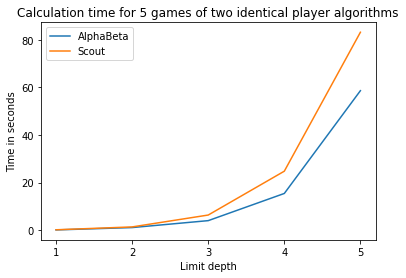

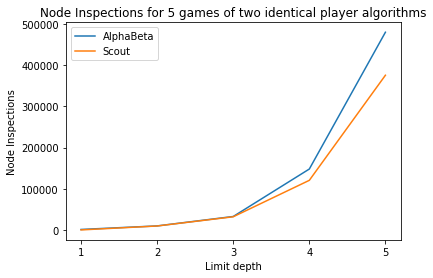

In [ ]:
draw_plots(times, counts)

**TODO!**

# Conclusion

When the limits get higher, it shows that Scout and AlphaBeta are faster than Minimax. The same applies to the node inspections.
That means that a faster AI with a higher limit needs similar computing time to a slower AI with a lower limit.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b91c3ea7-d814-439b-837a-72fdc90697b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>